# Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("prostate_cancer_prediction.csv")
data

,Patient_ID,Age,Family_History,Race_African_Ancestry,PSA_Level,DRE_Result,Biopsy_Result,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,...,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Screening_Age,Follow_Up_Required,Prostate_Volume,Genetic_Risk_Factors,Previous_Cancer_History,Early_Detection
0,1,78,No,Yes,5.07,Normal,Benign,No,No,No,...,Moderate,No,No,Normal,45,No,46.0,No,No,Yes
1,2,68,No,Yes,10.24,Normal,Benign,Yes,No,No,...,Low,No,No,High,65,No,78.2,No,No,Yes
2,3,54,No,No,13.79,Normal,Benign,No,No,No,...,Low,No,No,Normal,61,No,21.1,No,No,Yes
3,4,82,No,No,8.03,Abnormal,Benign,No,No,No,...,Low,No,No,Normal,47,Yes,79.9,No,Yes,Yes
4,5,47,Yes,No,1.89,Normal,Malignant,Yes,Yes,No,...,Moderate,Yes,No,Normal,72,No,32.0,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27940,27941,49,Yes,No,9.35,Normal,Benign,No,No,No,...,High,Yes,Yes,Normal,42,No,47.9,No,No,Yes
27941,27942,84,Yes,No,1.24,Normal,Benign,No,No,No,...,Moderate,Yes,No,Normal,47,Yes,55.3,No,No,Yes
27942,27943,69,No,No,5.01,Abnormal,Malignant,No,No,No,...,Low,Yes,No,Normal,44,No,47.0,No,Yes,Yes
27943,27944,50,No,No,5.71,Normal,Benign,Yes,Yes,No,...,Moderate,Yes,Yes,Normal,67,No,24.2,No,No,Yes


In [3]:

# Drop non-predictive features
data.drop('Patient_ID', axis=1, inplace=True)

# Encode the target variable (Biopsy_Result)
data['Biopsy_Result'] = data['Biopsy_Result'].map({'Benign': 0, 'Malignant': 1})

# One-hot encode categorical variables
categorical_cols = data.select_dtypes(include='object').columns
encoder = OneHotEncoder(drop='first', dtype=int)
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_cols]).toarray(),
                            columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and combine encoded data
data.drop(categorical_cols, axis=1, inplace=True)
data = pd.concat([data, encoded_data], axis=1)

# Scale numerical features
numerical_cols = ['Age', 'PSA_Level', 'BMI', 'Screening_Age', 'Prostate_Volume']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Split data into training and testing sets
X = data.drop('Biopsy_Result', axis=1)
y = data['Biopsy_Result']
X


,Age,PSA_Level,BMI,Screening_Age,Prostate_Volume,Family_History_Yes,Race_African_Ancestry_Yes,DRE_Result_Normal,Difficulty_Urinating_Yes,Weak_Urine_Flow_Yes,...,Smoking_History_Yes,Alcohol_Consumption_Low,Alcohol_Consumption_Moderate,Hypertension_Yes,Diabetes_Yes,Cholesterol_Level_Normal,Follow_Up_Required_Yes,Genetic_Risk_Factors_Yes,Previous_Cancer_History_Yes,Early_Detection_Yes
0,0.939988,-0.642309,-0.861585,-1.176363,-0.093872,0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
1,0.245761,0.596033,-1.250276,0.800335,1.627690,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,-0.726158,1.446345,-1.229818,0.404995,-1.425141,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
3,1.217679,0.066684,0.386317,-0.978694,1.718580,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,1
4,-1.212117,-1.403997,0.734093,1.492179,-0.842377,1,0,1,1,1,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27940,-1.073272,0.382856,0.488604,-1.472868,0.007711,1,0,1,0,0,...,1,0,0,1,1,1,0,0,0,1
27941,1.356525,-1.559688,-0.984330,-0.978694,0.403350,1,0,1,0,0,...,0,0,1,1,0,1,1,0,0,1
27942,0.315184,-0.656680,0.140828,-1.275198,-0.040407,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,1
27943,-1.003849,-0.489013,-1.086617,0.998004,-1.259401,0,0,1,1,1,...,0,0,1,1,1,1,0,0,0,1


In [4]:
# Check for CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to tensors
X_train_tensor, y_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device), torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_val_tensor, y_val_tensor = torch.tensor(X_val.values, dtype=torch.float32).to(device), torch.tensor(y_val.values, dtype=torch.float32).to(device)
X_test_tensor, y_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device), torch.tensor(y_test.values, dtype=torch.float32).to(device)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)


Using device: cuda


In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [12]:
# Initialize model, loss function, and optimizer
model = NeuralNetwork(X_train.shape[1]).to(device)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs=100, initial_lr=0.004, patience=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()

            outputs = model(inputs).squeeze() 

            loss = criterion(outputs, targets) 

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation step
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs).squeeze()
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        scheduler.step(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    model.load_state_dict(torch.load("best_model.pth"))

    # Plot training and validation loss
    plt.figure(figsize=(10,5))
    plt.plot(range(len(train_losses)), train_losses, label="Train Loss")
    plt.plot(range(len(val_losses)), val_losses, label="Validation Loss", linestyle="dashed")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training and Validation Loss Over Epochs")
    plt.show()

    return model


# Evaluation loop
def evaluate(model, loader):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch).squeeze()
            predictions = (outputs >= 0.5).float()

            all_targets.extend(y_batch.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    print("Sample Predictions:", all_predictions[:20])
    print("Sample Targets:", all_targets[:20])

    # Compute metrics
    accuracy = accuracy_score(all_targets, all_predictions)
    precision = precision_score(all_targets, all_predictions, zero_division=0)
    recall = recall_score(all_targets, all_predictions, zero_division=0)
    f1 = f1_score(all_targets, all_predictions, zero_division=0)

    # Print results
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return accuracy, precision, recall, f1



Epoch 1/100, Train Loss: 0.6235, Val Loss: 0.6133
Epoch 2/100, Train Loss: 0.6121, Val Loss: 0.6121
Epoch 3/100, Train Loss: 0.6115, Val Loss: 0.6116
Epoch 4/100, Train Loss: 0.6105, Val Loss: 0.6115
Epoch 5/100, Train Loss: 0.6104, Val Loss: 0.6116
Epoch 6/100, Train Loss: 0.6098, Val Loss: 0.6116
Epoch 7/100, Train Loss: 0.6096, Val Loss: 0.6116
Epoch 8/100, Train Loss: 0.6079, Val Loss: 0.6115
Epoch 9/100, Train Loss: 0.6072, Val Loss: 0.6121
Epoch 10/100, Train Loss: 0.6064, Val Loss: 0.6124
Epoch 11/100, Train Loss: 0.6042, Val Loss: 0.6122
Epoch 12/100, Train Loss: 0.6038, Val Loss: 0.6123
Epoch 13/100, Train Loss: 0.6040, Val Loss: 0.6124
Epoch 14/100, Train Loss: 0.6041, Val Loss: 0.6126
Epoch 15/100, Train Loss: 0.6030, Val Loss: 0.6126
Epoch 16/100, Train Loss: 0.6031, Val Loss: 0.6126
Epoch 17/100, Train Loss: 0.6024, Val Loss: 0.6126
Epoch 18/100, Train Loss: 0.6028, Val Loss: 0.6126
Epoch 19/100, Train Loss: 0.6029, Val Loss: 0.6126
Epoch 20/100, Train Loss: 0.6029, Val Lo

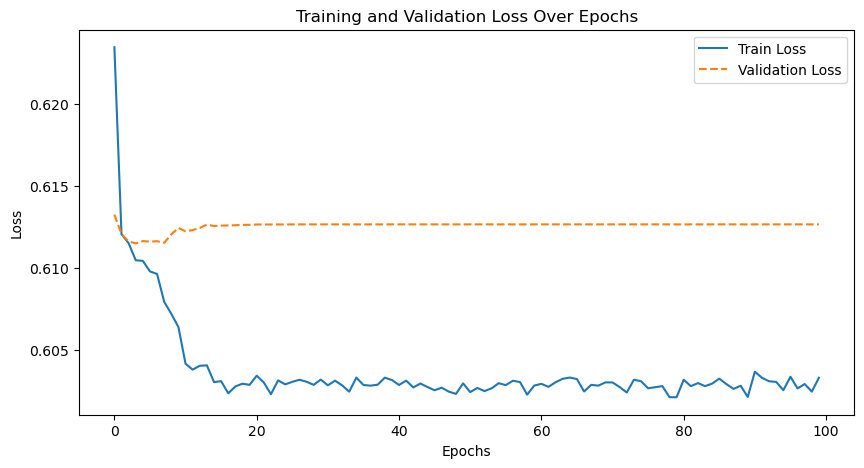

Sample Predictions: [np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0)]
Sample Targets: [np.float32(1.0), np.float32(0.0), np.float32(0.0), np.float32(1.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.0), np.float32(0.0), np.float32(0.0), np.float32(1.0), np.float32(0.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(0.0)]
Test Accuracy: 69.75%
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


(0.6975190839694656, 0.0, 0.0, 0.0)

In [13]:
# Train and evaluate the model
train(model, train_loader, val_loader, criterion, optimizer, num_epochs=100)
evaluate(model, test_loader)

## Model Optimization

In [8]:
# Training loop with optimization
def optimized_train(model, train_loader, val_loader, criterion, optimizer, num_epochs=100, patience=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)
    best_val_loss = float('inf')
    patience_counter = 0

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()

            outputs = model(inputs).squeeze()
            loss = criterion(outputs, targets)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation step
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs).squeeze()
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        scheduler.step(avg_val_loss)

        # Early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            torch.save(model.state_dict(), "best_model.pth")
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Load the best model before returning
    model.load_state_dict(torch.load("best_model.pth"))

    # Plot training and validation loss
    plt.figure(figsize=(10,5))
    plt.plot(range(len(train_losses)), train_losses, label="Train Loss")
    plt.plot(range(len(val_losses)), val_losses, label="Validation Loss", linestyle="dashed")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training and Validation Loss Over Epochs")
    plt.show()

    return model


Epoch 1/100, Train Loss: 0.6095, Val Loss: 0.6112
Epoch 2/100, Train Loss: 0.6101, Val Loss: 0.6112
Epoch 3/100, Train Loss: 0.6099, Val Loss: 0.6112
Epoch 4/100, Train Loss: 0.6099, Val Loss: 0.6112
Epoch 5/100, Train Loss: 0.6098, Val Loss: 0.6112
Epoch 6/100, Train Loss: 0.6103, Val Loss: 0.6112
Epoch 7/100, Train Loss: 0.6098, Val Loss: 0.6112
Epoch 8/100, Train Loss: 0.6100, Val Loss: 0.6112
Epoch 9/100, Train Loss: 0.6096, Val Loss: 0.6112
Epoch 10/100, Train Loss: 0.6095, Val Loss: 0.6112
Epoch 11/100, Train Loss: 0.6096, Val Loss: 0.6112
Epoch 12/100, Train Loss: 0.6099, Val Loss: 0.6112
Epoch 13/100, Train Loss: 0.6096, Val Loss: 0.6112
Epoch 14/100, Train Loss: 0.6098, Val Loss: 0.6112
Epoch 15/100, Train Loss: 0.6098, Val Loss: 0.6112
Epoch 16/100, Train Loss: 0.6094, Val Loss: 0.6112
Epoch 17/100, Train Loss: 0.6100, Val Loss: 0.6112
Epoch 18/100, Train Loss: 0.6101, Val Loss: 0.6112
Epoch 19/100, Train Loss: 0.6096, Val Loss: 0.6112
Epoch 20/100, Train Loss: 0.6097, Val Lo

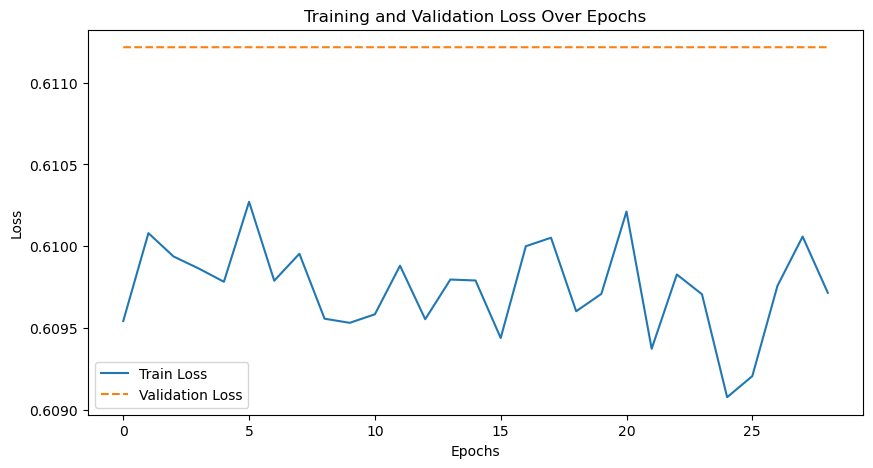

Test Accuracy: 69.75%
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


(0.6975190839694656, 0.0, 0.0, 0.0)

In [9]:
optimized_train(model, train_loader, val_loader, criterion, optimizer, num_epochs=100)
evaluate(model, test_loader)

In [11]:
import collections
print("Class distribution:", collections.Counter(y_test))

Class distribution: Counter({0: 2924, 1: 1268})
